# Logistic Regression

Logistic regression is another technique borrowed by machine learning from the field of statistics. It is the `go-to method` for `binary classification` problems (problems with two class values).

### Why the name?
- Logistic regression is named for the function used at the core of the method, the logistic function. Also
  called `Sigmoid` function

### What is Sigmoid function?
- It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but `never` exactly at those limits.

$$f(x) = \frac{1}{1 + e^{-x}} \quad \text{(sigmoid function)}$$

    e: Euler's number, In basic words: base of the natural logarithms

### Representation used for logistic regression
$$y = \frac{1}{1 + e^{-(B0 + B1x)}}$$

    y: predicted output.
    B0: Bias/Intercept
    B1: coefficient for the single input value (x)
    
    Note:  A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.


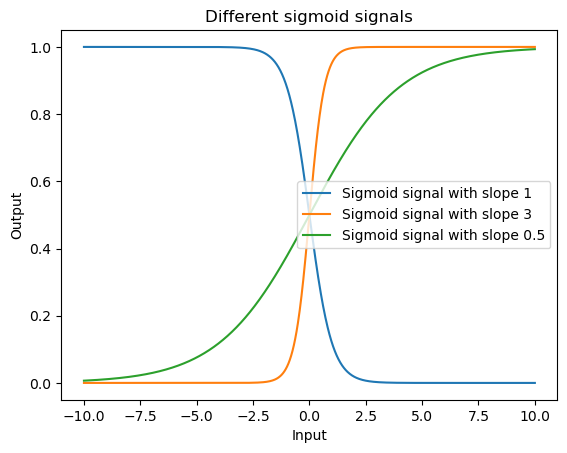

In [1]:
# Sigmoid function:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
  return 1 / (1 + np.exp(-x))


# Generate a sigmoid signal with a slope of 1
x = np.linspace(-10, 10, 1000)
y = sigmoid(-2*x)

# Generate a sigmoid signal with a slope of 2
x2 = np.linspace(-10, 10, 1000)
y2 = sigmoid(3 * x2)

# Generate a sigmoid signal with a slope of 0.5
x3 = np.linspace(-10, 10, 1000)
y3 = sigmoid(0.5 * x3)

plt.plot(x, y, label='Sigmoid signal with slope 1')
plt.plot(x2, y2, label='Sigmoid signal with slope 3')
plt.plot(x3, y3, label='Sigmoid signal with slope 0.5')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Different sigmoid signals')
plt.show()


# Logistic Regression Predicts Probabilities

- Logistic regression can be done only for 2 classes (binary).
- Logistic regression models the probability of the `default class` (e.g. the `first class`) Whichever comes first in dataset.

if we are modeling people’s sex as male or female from their height, then the first class could be male and the logistic regression model could be written as the probability of male given a person’s height, or more formally:

$$
P(sex = Male|Height)
$$

Written another way, we are modeling the probability that an input (X) belongs to the
default class (Y = 0), we can write this formally as:

$$
P(X) = P(Y = 0|X)
$$

Then prediction are converted to class:

$$prediction = 0 IF p(male) < 0.5$$

$$prediction = 1 IF p(male) ≥ 0.5$$

# Learning Logistic regression

- The coefficients of the logistic regression algorithm must be `estimated` from your training data. This is done using `maximum-likelihood estimation`.
- `Maximum-likelihood estimation` is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data
- In the end:
    - The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class.

---
# Best practices:
- `Binary Output Variable`: This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
  
- `Remove Noise`: Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
  
- `Gaussian Distribution`: Logistic regression is a linear algorithm (with a nonlinear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
  
- `Remove Correlated Inputs`: Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
  
- `Fail to Converge`: It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

# Code translation

- Default class: 0
- if p>0.5: Class 0 else Class 1.

$$
output = B0 + B1 × X1 + B2 × X2 .... + (Bn x Xn)
$$

$$
p(class = 0) = \frac{1}{1 + e^{−output}}
$$

Updating Co-efficients:
$$
b = b + alpha × (y − prediction) × prediction × (1 − prediction) × x
$$
    
    b = coefficient we are currently updating.
    prediction = prediction we got after apply that in sigmoid function.
    alpha = learning rate; how much should i update my values.
    y = actual class.
    x = input value.
    

Accuracy: 0.7777777777777778


c:\ProgramData\anaconda3\envs\SuperEnv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


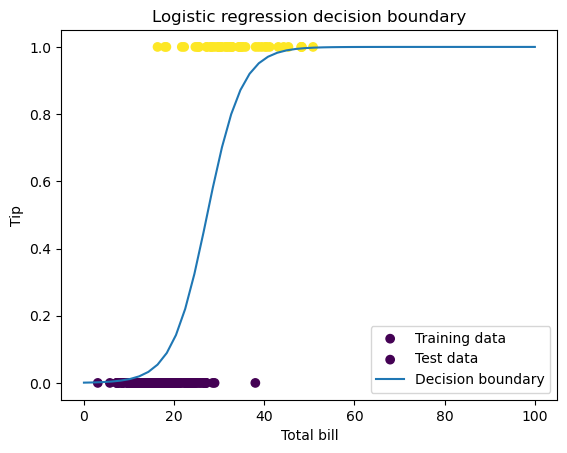

In [2]:
#sample program.


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Load the Seaborn dataset
tips = sns.load_dataset("tips")

tips['big_tip'] = np.where(tips['tip']>=4,1,0)


X = tips[['total_bill']].values
Y = tips["big_tip"].values
# Split the data into training and test sets
X_train, X_test, y_train, y_test = X[:100],X[100:], Y[:100], Y[100:]

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = model.score(X_test, y_test)

# Print the accuracy of the model
print("Accuracy:", accuracy)

# Plot the decision boundary
plt.scatter(X_train, y_train, c=y_train, label="Training data")
plt.scatter(X_test, y_pred, c=y_pred, label="Test data")
plt.plot(np.linspace(0, 100), model.predict_proba(np.linspace(0, 100).reshape(-1,1))[:, 1], label="Decision boundary")
plt.legend()
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Logistic regression decision boundary")
plt.show()

In [3]:
LogisticRegression??

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Source:        
class LogisticRegression(LinearClassifierMixin, SparseCoefMixin, BaseEstimator):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    that reg